# 第3章　最尤推定法：確率を用いた推定理論

## 3.3 付録 ― 標本平均／標本分散の一致性と不偏性

平均 0、標準偏差 1 の正規分布を用いて、「N 個のデータを取得して標本平均、標本分散、不変分散を求める」という操作を 2000 回繰り返して、それぞれの平均値を求めます。これをさらに、N を2〜51に変化させて実行します。

**[03EB-01]**

必要なモジュールをインポートします。

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

**[03EB-02]**

それぞれの結果を保存するリストを用意します。

In [17]:
# 2000回繰り返した際の個々のデータ
raw_linex = []    # データ数
raw_mu = []       # 標本平均
raw_s2 = []       # 標本分散
raw_u2 = []       # 不変分散

# 2000回全体の平均値
mean_linex = []    # データ数
mean_mu = []       # 標本平均
mean_s2 = []       # 標本分散
mean_u2 = []       # 不変分散

**[03EB-03]**

データの取得と推定を実施します。

In [18]:
for n in np.arange(2, 51):  # 観測データ数Nを変化させて実行
  for _ in range(2000):     # 特定のNについて2000回の推定を繰り返す
    ds = normal(loc=0, scale=1, size=n)
    raw_mu.append(np.mean(ds))        # 標本平均
    raw_s2.append(np.var(ds))         # 標本分散
    raw_u2.append(np.var(ds)*n/(n-1)) # 不偏分散
    raw_linex.append(n)
  mean_mu.append(np.mean(raw_mu)) # 標本平均の平均
  mean_s2.append(np.mean(raw_s2)) # 標本分散の平均
  mean_u2.append(np.mean(raw_u2)) # 不偏分散の平均
  mean_linex.append(n)

**[03EB-04]**

グラフを見やすくするために、2000 個のデータを40 個に間引きます。

In [19]:
raw_linex = raw_linex[0:-1:50]
raw_mu = raw_mu[0:-1:50]
raw_s2 = raw_s2[0:-1:50]
raw_u2 = raw_u2[0:-1:50]

**[03EB-05]**

結果をグラフに描画する関数を用意します。

In [20]:
def draw_subplot(subplot, linex1, liney1, linex2, liney2, ylim):
  subplot.tick_params(axis='x', labelsize=10)
  subplot.tick_params(axis='y', labelsize=10)
  subplot.set_xlim(min(linex1), max(linex1)+1)
  subplot.set_ylim(ylim)
  subplot.scatter(linex1, liney1, s=10)
  subplot.plot(linex2, liney2, color='red', linewidth=3, label="mean")
  subplot.legend(loc=0, fontsize=10)

**[03EB-06]**

標本平均のグラフを表示します。

データ数によらず、「標本平均の平均」は真の平均0に一致することがわかります。

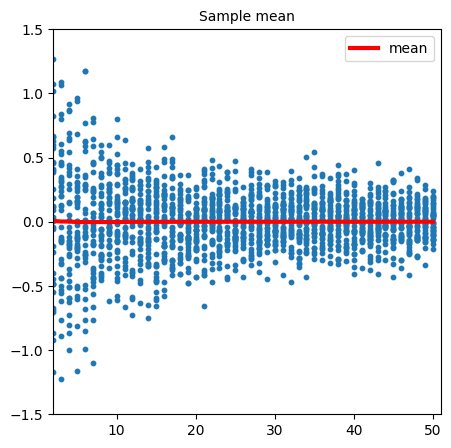

In [21]:
fig = plt.figure(figsize=(5, 5))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_title('Sample mean', fontsize=10)
draw_subplot(subplot, raw_linex, raw_mu, mean_linex, mean_mu, (-1.5, 1.5))

**[03EB-07]**

標本分散のグラフを表示します。

データ数が少ない場合、「標本分散の平均」は真の分散1より小さくなることがわかります。


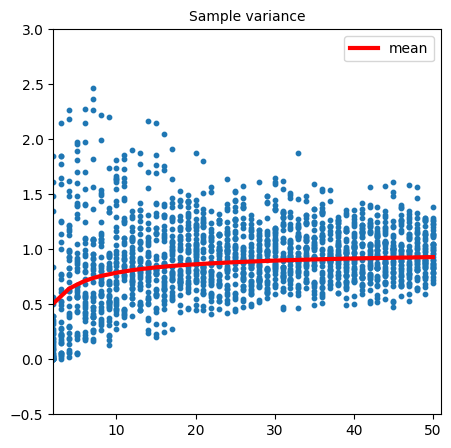

In [22]:
fig = plt.figure(figsize=(5, 5))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_title('Sample variance', fontsize=10)
draw_subplot(subplot, raw_linex, raw_s2, mean_linex, mean_s2, (-0.5, 3.0))

**[03EB-08]**

不偏分散のグラフを表示します。

データ数によらず、「不偏分散の平均」は真の分散1に一致することがわかります。

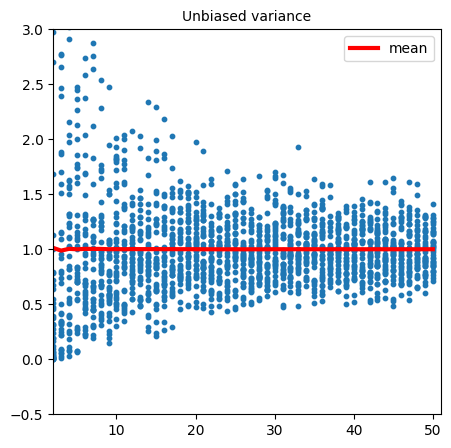

In [23]:
fig = plt.figure(figsize=(5, 5))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_title('Unbiased variance', fontsize=10)
draw_subplot(subplot, raw_linex, raw_u2, mean_linex, mean_u2, (-0.5, 3.0))